Mounted at /content/drive


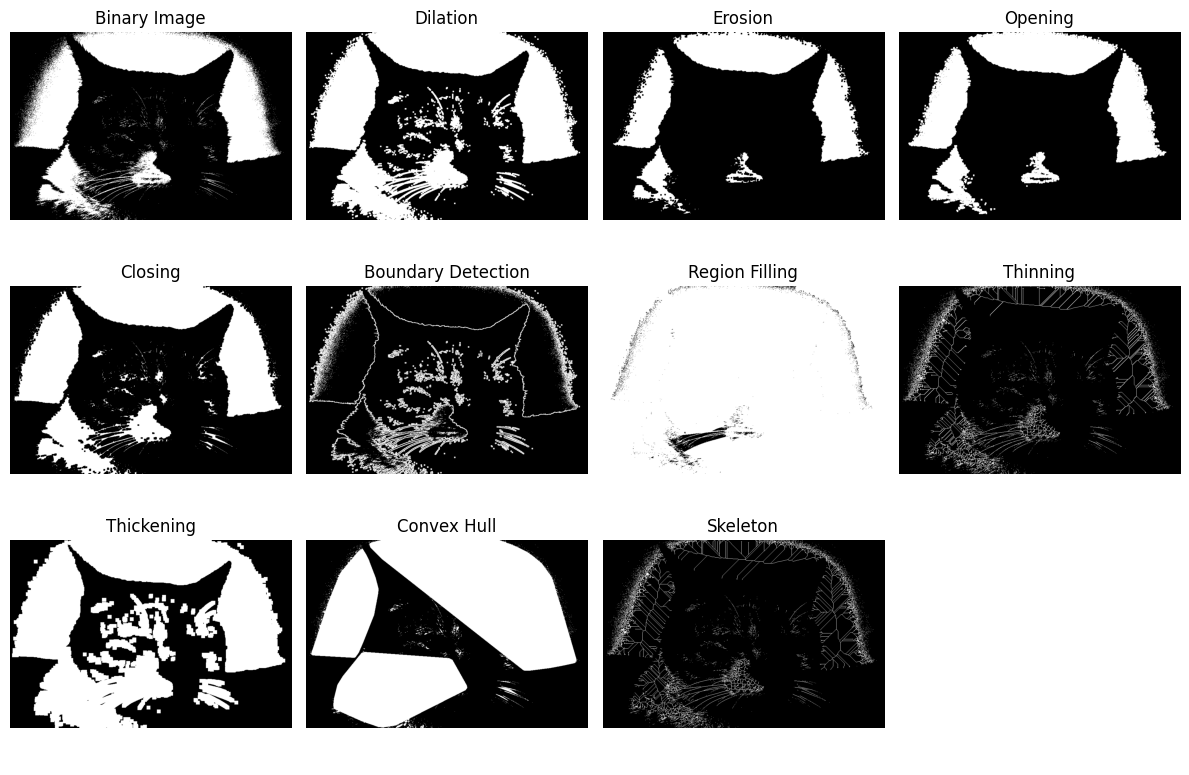

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from collections import defaultdict
import heapq
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
# Load the image (ensure it is in grayscale)
image_path = '/content/drive/My Drive/CAT.jpg'  # Updated image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError("Image not found. Check the path.")

# Convert the image to binary (thresholding)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Create a kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# 1. Dilation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

# 2. Erosion
eroded_image = cv2.erode(binary_image, kernel, iterations=1)

# 3. Opening (Erosion followed by Dilation)
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# 4. Closing (Dilation followed by Erosion)
closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# 5. Boundary Detection (Difference between dilation and original image)
boundary_image = dilated_image - binary_image

# 6. Region Filling (Floodfill using a starting point)
flood_filled_image = binary_image.copy()
cv2.floodFill(flood_filled_image, None, (10, 10), 255)

# 7. Thinning (Skeletonization using OpenCV)
thinned_image = cv2.ximgproc.thinning(binary_image)  # Requires opencv-contrib-python

# 8. Thickening
thickened_image = cv2.dilate(binary_image, kernel, iterations=3)

# 9. Convex Hull
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
convex_hull_image = np.zeros_like(binary_image)
for contour in contours:
    hull = cv2.convexHull(contour)
    cv2.drawContours(convex_hull_image, [hull], -1, 255, thickness=cv2.FILLED)

# 10. Skeleton (using `skimage`)
skeleton_image = skeletonize(binary_image // 255) * 255

# Plot all images for comparison
fig, axes = plt.subplots(3, 4, figsize=(12, 8))  # Creates a 3x4 grid for 12 subplots

titles = [
    'Binary Image', 'Dilation', 'Erosion', 'Opening',
    'Closing', 'Boundary Detection', 'Region Filling', 'Thinning',
    'Thickening', 'Convex Hull', 'Skeleton'
]

images = [
    binary_image, dilated_image, eroded_image, opened_image,
    closed_image, boundary_image, flood_filled_image, thinned_image,
    thickened_image, convex_hull_image, skeleton_image
]

# Display images with their respective titles
for i, ax in enumerate(axes.flat):
    if i < len(images):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    else:
        ax.axis('off')  # Turn off axes for unused subplots

plt.tight_layout()
plt.show()
